In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_excel("data/InjuryCauseTopThirteen.xlsx")


In [5]:
data

,InjuryCauseDesc,InjuryDesc
0,Struck by falling object,DOING SECURITY ON THE PIER FOR PAINTING OF WHA...
1,"Bending, climbing, crawling, reaching, twisting",IW WAS MOVING A CARTON OF SHAVING CREAM AND HA...
2,"Bending, climbing, crawling, reaching, twisting",PICKING UP BOXES OF FILES AND HURT LOWER BACK
3,Struck by falling object,BEAM SLIPPED AND STRUCK EE'S RIGHT WRIST.
4,Overexertion in lifting,EMPLOYEE STATED THAT HE FELT STRAIN IN HIS LOW...
...,...,...
101423,Struck by slipping handheld object,Employee was slicing food with a knife and it ...
101424,Rubbed or abraded by foreign matter in eye,Employee was cleaning the Davinci arm using th...
101425,"Bending, climbing, crawling, reaching, twisting",allegedly tweaked her back While checking the ...
101426,"Fall to floor, walkway, or other surface",Employee reports she was sitting in a chair an...


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(data.InjuryCauseDesc)
data['label']=label

In [7]:
data

,InjuryCauseDesc,InjuryDesc,label
0,Struck by falling object,DOING SECURITY ON THE PIER FOR PAINTING OF WHA...,11
1,"Bending, climbing, crawling, reaching, twisting",IW WAS MOVING A CARTON OF SHAVING CREAM AND HA...,0
2,"Bending, climbing, crawling, reaching, twisting",PICKING UP BOXES OF FILES AND HURT LOWER BACK,0
3,Struck by falling object,BEAM SLIPPED AND STRUCK EE'S RIGHT WRIST.,11
4,Overexertion in lifting,EMPLOYEE STATED THAT HE FELT STRAIN IN HIS LOW...,5
...,...,...,...
101423,Struck by slipping handheld object,Employee was slicing food with a knife and it ...,12
101424,Rubbed or abraded by foreign matter in eye,Employee was cleaning the Davinci arm using th...,8
101425,"Bending, climbing, crawling, reaching, twisting",allegedly tweaked her back While checking the ...,0
101426,"Fall to floor, walkway, or other surface",Employee reports she was sitting in a chair an...,4


In [8]:
# drop nan
data.dropna(inplace=True)

In [9]:
data.label.value_counts()

4     15882
5     14716
3     13317
9      8953
1      6972
6      5868
11     5796
0      5674
10     5329
7      5257
12     5102
2      4509
8      4037
Name: label, dtype: int64

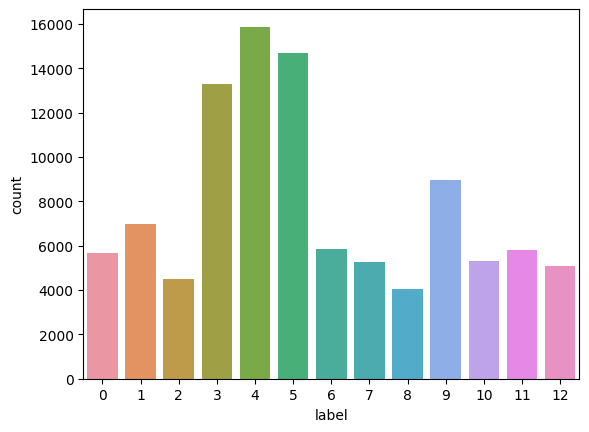

In [10]:
sns.countplot(x=data.label)
plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import contractions
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
#     print(review)
    review_cleaned = review.lower() #lowercase
    review_cleaned = review_cleaned.replace("<br />"," ")
    
    #URLs
    review_cleaned = re.sub(r"http\S+",'', review_cleaned)
    review_cleaned = re.sub(r"www.\S+", "", review_cleaned) 
    
#     numbers
    review_cleaned = re.sub(r'\d+', '', review_cleaned)
    
#     contractions
    review_cleaned = contractions.fix(review_cleaned)
    
    #punctuations
    
    review_cleaned = "".join([char for char in review_cleaned if char not in string.punctuation])
    
    #stopwords
    stopword = nltk.corpus.stopwords.words('english')
    
    review_cleaned = " ".join([word for word in re.split('\W+', review_cleaned)
        if word not in stopword])
    
    #tokenize 
    
    review_cleaned = word_tokenize(review_cleaned) # tokenize
  
    #lemmatizer
    wn = nltk.WordNetLemmatizer()
    review_cleaned = [wn.lemmatize(word) for word in review_cleaned]
    
    #Join tokens into string
    review_cleaned = (" ").join(review_cleaned)


    return review_cleaned

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/adithyaabhishek/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adithyaabhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adithyaabhishek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adithyaabhishek/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [12]:
data.InjuryDesc = data.InjuryDesc.apply(clean_text)
data.to_pickle("data/injury_descriptions_processed.pkl")

In [13]:
injury_df = pd.read_pickle("Data/injury_descriptions_processed.pkl")

In [14]:
injury_df 

,InjuryCauseDesc,InjuryDesc,label
0,Struck by falling object,security pier painting whale mural keeping are...,11
1,"Bending, climbing, crawling, reaching, twisting",iw moving carton shaving cream sudden onset lbp,0
2,"Bending, climbing, crawling, reaching, twisting",picking box file hurt lower back,0
3,Struck by falling object,beam slipped struck ee right wrist,11
4,Overexertion in lifting,employee stated felt strain lower back groin l...,5
...,...,...,...
101423,Struck by slipping handheld object,employee slicing food knife slipped lacerated ...,12
101424,Rubbed or abraded by foreign matter in eye,employee cleaning davinci arm using psi liquid...,8
101425,"Bending, climbing, crawling, reaching, twisting",allegedly tweaked back checking cavallaro order,0
101426,"Fall to floor, walkway, or other surface",employee report sitting chair went get leaned ...,4


In [16]:
X = injury_df.InjuryDesc
y = injury_df.label

In [17]:
def token_process_split(data_local):
    vectorizer = TfidfVectorizer(max_features=4000, decode_error="ignore",ngram_range=(1,2))
    Xvec = vectorizer.fit_transform(data_local.InjuryDesc)
    y = data_local.label
    
    x_train,x_test,y_train,y_test = train_test_split(Xvec,y,test_size=0.2,random_state=42)
    
    return x_train,x_test,y_train,y_test

## whole dataset

In [18]:
x_train_w,x_test_w,y_train_w,y_test_w = token_process_split(data)
x_train_w,x_test_w,y_train_w,y_test_w

(<81129x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 1132047 stored elements in Compressed Sparse Row format>,
 <20283x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 284247 stored elements in Compressed Sparse Row format>,
 92879    12
 56501     5
 75937     0
 69165     2
 13576     4
          ..
 6266     12
 54889     4
 76824     2
 860       1
 15796     2
 Name: label, Length: 81129, dtype: int64,
 43836     3
 16671    12
 54211     4
 7210      9
 47507     2
          ..
 41239     0
 19810     2
 57212     3
 75789     1
 93150     9
 Name: label, Length: 20283, dtype: int64)

In [19]:
mng = MultinomialNB()
mng.fit(x_train_w,y_train_w)

MultinomialNB()

In [20]:
y_pred = mng.predict(x_test_w)

In [21]:
accuracy_score(y_test_w, y_pred)

0.6316619829413794

# Deleting problematic classes


In [40]:
injury_new_df = data[
    ~data.InjuryCauseDesc.str.contains("Bodily reaction and exertion, unspecified")]
injuryDataFrame = data[~data.InjuryCauseDesc.str.contains("Bodily reaction, n.e.c.")]

In [41]:
injury_new_df.reset_index(inplace=True)
injury_new_df.drop(['index','label'], axis=1,inplace=True)
injury_new_df

/var/folders/gy/hjflsmyx53jch_h0701bpwdc0000gn/T/ipykernel_61780/3302687144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_new_df.drop(['index','label'], axis=1,inplace=True)


,InjuryCauseDesc,InjuryDesc
0,Struck by falling object,security pier painting whale mural keeping are...
1,"Bending, climbing, crawling, reaching, twisting",iw moving carton shaving cream sudden onset lbp
2,"Bending, climbing, crawling, reaching, twisting",picking box file hurt lower back
3,Struck by falling object,beam slipped struck ee right wrist
4,Overexertion in lifting,employee stated felt strain lower back groin l...
...,...,...
94435,Struck by slipping handheld object,employee slicing food knife slipped lacerated ...
94436,Rubbed or abraded by foreign matter in eye,employee cleaning davinci arm using psi liquid...
94437,"Bending, climbing, crawling, reaching, twisting",allegedly tweaked back checking cavallaro order
94438,"Fall to floor, walkway, or other surface",employee report sitting chair went get leaned ...


In [42]:
le = LabelEncoder()
label = le.fit_transform(injury_new_df.InjuryCauseDesc)
injury_new_df['label']=label


/var/folders/gy/hjflsmyx53jch_h0701bpwdc0000gn/T/ipykernel_61780/3901781254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_new_df['label']=label


In [46]:
injury_new_df.label.value_counts()

3     15882
4     14716
2     13317
8      8953
5      5868
10     5796
0      5674
9      5329
6      5257
11     5102
1      4509
7      4037
Name: label, dtype: int64

In [248]:
x_train_w,x_test_w,y_train_w,y_test_w = token_process_split(injury_new_df)
x_train_w,x_test_w,y_train_w,y_test_w

(<75552x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 1055770 stored elements in Compressed Sparse Row format>,
 <18888x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 262210 stored elements in Compressed Sparse Row format>,
 86020     9
 1409      8
 88986     3
 56629     4
 36873     3
          ..
 6265      0
 54886    11
 76820     2
 860       2
 15795     8
 Name: label, Length: 75552, dtype: int64,
 78450    8
 34191    0
 58492    2
 60737    2
 83327    3
         ..
 30661    3
 58290    6
 55066    2
 80358    6
 21338    3
 Name: label, Length: 18888, dtype: int64)

In [249]:
mng.fit(x_train_w,y_train_w)
y_pred = mng.predict(x_test_w)
y_train_pred = mng.predict(x_train_w)

print('Accuracy testing',accuracy_score(y_test_w, y_pred))
print('Accuracy training',accuracy_score(y_train_w, y_train_pred))

print(classification_report(y_test_w, y_pred))


Accuracy testing 0.6760906395595087
Accuracy training 0.7013182973316391
              precision    recall  f1-score   support

           0       0.65      0.40      0.50      1104
           1       0.45      0.10      0.17       903
           2       0.61      0.69      0.65      2722
           3       0.71      0.88      0.79      3166
           4       0.65      0.91      0.76      2937
           5       0.73      0.45      0.56      1188
           6       0.67      0.82      0.74      1037
           7       0.90      0.91      0.91       779
           8       0.63      0.49      0.55      1772
           9       0.67      0.48      0.56      1051
          10       0.77      0.67      0.71      1192
          11       0.65      0.60      0.62      1037

    accuracy                           0.68     18888
   macro avg       0.68      0.62      0.63     18888
weighted avg       0.67      0.68      0.66     18888



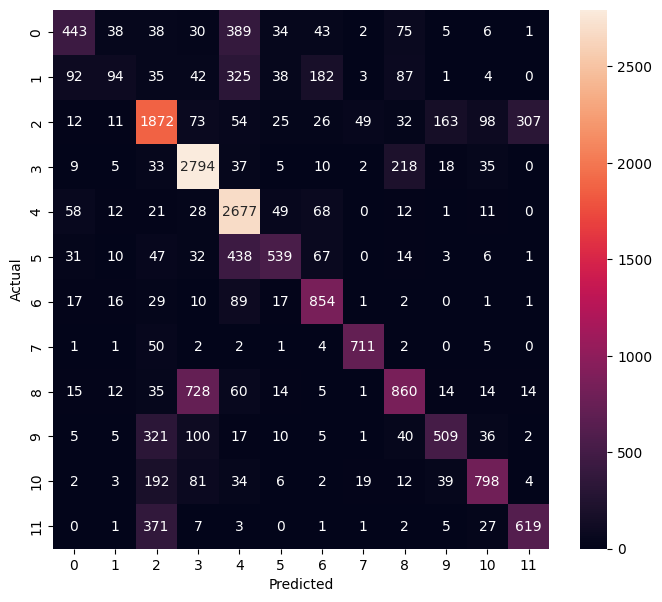

In [48]:
# Display heatmap confusion matrix
conf_mat = confusion_matrix(y_test_w, y_pred)
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
# splitting classes for experimentation
data = injury_new_df
X0 = data[data.label == 0]
X1 = data[data.label == 1]
X2 = data[data.label == 2]
X3 = data[data.label == 3]
X4 = data[data.label == 4]
X5 = data[data.label == 5]
X6 = data[data.label == 6]
X7 = data[data.label == 7]
X8 = data[data.label == 8]
X9 = data[data.label == 9]
X10 = data[data.label == 10]
X11 = data[data.label == 11]



# Test on top 3 classes

In [28]:
data_lrg = pd.concat([X3,X4,X5])


In [29]:
data_lrg

,InjuryCauseDesc,InjuryDesc,label
15,"Contact with objects and equipment, unspecified",employee cellulitis left knee infected abrasio...,3
35,"Contact with objects and equipment, unspecified",tending patient sled behind something dug slid...,3
52,"Contact with objects and equipment, unspecified",picked x laying table stuck lancet,3
58,"Contact with objects and equipment, unspecified",employee scratched eye sometime work day,3
61,"Contact with objects and equipment, unspecified",employee cut across finger left hand woth util...,3
...,...,...,...
101407,Overexertion in lifting,employee state moving heavy box one building d...,5
101408,Overexertion in lifting,employee lifting landscape block trailer felt ...,5
101413,Overexertion in lifting,employee lifting coworker heavy piece metal du...,5
101419,Overexertion in lifting,employee report hanging stand overhead weighed...,5


In [30]:
x_train,x_test,y_train,y_test = token_process_split(data_lrg)
x_train,x_test,y_train,y_test

(<35132x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 505217 stored elements in Compressed Sparse Row format>,
 <8783x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 127076 stored elements in Compressed Sparse Row format>,
 50017    4
 84890    4
 96123    3
 9846     5
 96983    4
         ..
 46716    3
 80324    3
 58354    5
 8986     3
 26929    4
 Name: label, Length: 35132, dtype: int64,
 28659    4
 39429    3
 20170    5
 89164    4
 9359     4
         ..
 280      5
 47388    4
 55960    4
 56189    5
 76849    4
 Name: label, Length: 8783, dtype: int64)

# model

In [31]:
mng = MultinomialNB()
mng.fit(x_train,y_train)

MultinomialNB()

In [32]:
y_pred = mng.predict(x_test)

In [34]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9524080610269839
              precision    recall  f1-score   support

           3       0.97      0.91      0.94      2704
           4       0.94      0.96      0.95      3125
           5       0.95      0.98      0.96      2954

    accuracy                           0.95      8783
   macro avg       0.95      0.95      0.95      8783
weighted avg       0.95      0.95      0.95      8783



## test model with bracket 1 and 2

In [120]:
X3_ds = X3.sample(n=12000)
X4_ds = X4.sample(n=12000)
X2_ds = X2.sample(n=12000)

x8_s = X8.sample(n=(10000-len(X9)))
x5_s = X5.sample(n=(8000-len(X1)))
x10_s = X10.sample(n=(8000-len(X6)))



In [121]:
data_lrg2 = pd.concat([X3_ds,X4_ds,X2_ds,X8,X5,X10,x8_s,x5_s,x10_s])

In [122]:
x_train2,x_test2,y_train2,y_test2 = token_process_split(data_lrg2)


In [123]:
mng2 = MultinomialNB()
mng2.fit(x_train2,y_train2)

MultinomialNB()

In [124]:
y_pred2 = mng2.predict(x_test2)
y_pred_train2 = mng2.predict(x_train2)

In [125]:
accuracy_score(y_test2, y_pred2)

0.7844502036282858

In [126]:
print('testset acc:',accuracy_score(y_train2, y_pred_train2))

testset acc: 0.80345076549975


## Using - Random forest on whole dataset

In [217]:
rfc2=RandomForestClassifier(random_state=161, max_depth=20,max_features=150)
# rfc2=RandomForestClassifier(n_estimators= 150, criterion='gini')

In [218]:
rfc2.fit(x_train_w,y_train_w)

RandomForestClassifier(max_depth=20, max_features=150, random_state=161)

In [219]:
pred=rfc2.predict(x_test_w)
train_pred = rfc2.predict(x_train_w)

In [220]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_w,pred))

Accuracy for Random Forest on CV data:  0.6290766624311732


In [221]:
print("Accuracy Random Forest on CV ,training : ",accuracy_score(y_train_w,train_pred))

Accuracy Random Forest on CV ,training :  0.6759847522236341


In [222]:
print(classification_report(y_test_w,pred))

              precision    recall  f1-score   support

           0       0.70      0.30      0.42      1104
           1       0.62      0.03      0.05       903
           2       0.50      0.78      0.60      2722
           3       0.67      0.91      0.77      3166
           4       0.58      0.90      0.71      2937
           5       0.75      0.44      0.55      1188
           6       0.75      0.58      0.65      1037
           7       0.84      0.92      0.88       779
           8       0.64      0.47      0.54      1772
           9       0.69      0.32      0.44      1051
          10       0.86      0.41      0.55      1192
          11       0.69      0.40      0.51      1037

    accuracy                           0.63     18888
   macro avg       0.69      0.54      0.56     18888
weighted avg       0.66      0.63      0.60     18888



>15, train: 0.621, test: 0.593
>16, train: 0.627, test: 0.596
>17, train: 0.644, test: 0.610
>18, train: 0.655, test: 0.617
>19, train: 0.664, test: 0.621
>20, train: 0.674, test: 0.626
>21, train: 0.679, test: 0.627
>22, train: 0.690, test: 0.632
>23, train: 0.703, test: 0.639
>24, train: 0.714, test: 0.643


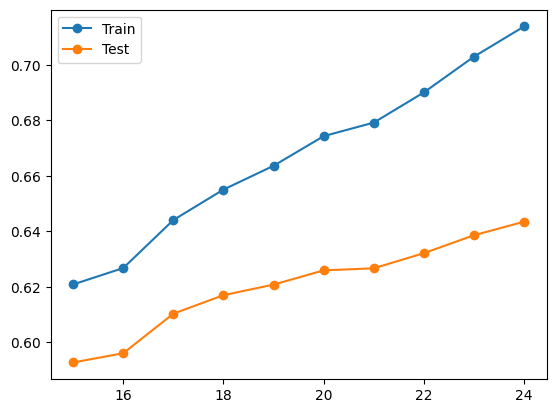

In [245]:
from matplotlib import pyplot

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(15, 25)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
    model = RandomForestClassifier(max_depth=i,max_features=150)
 # fit model on the training dataset
    model.fit(x_train_w, y_train_w)
 # evaluate on the train dataset
    train_yhat = model.predict(x_train_w)
    train_acc = accuracy_score(y_train_w, train_yhat)
    train_scores.append(train_acc)
 # evaluate on the test dataset
    test_yhat = model.predict(x_test_w)
    test_acc = accuracy_score(y_test_w, test_yhat)
    test_scores.append(test_acc) # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

## Random forest decision tree top 3 classes

In [116]:
rm_clf = RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
rm_clf.fit(x_train,y_train) 

In [ ]:
y_pred_rm = rm_clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_rm)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,50,80],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose = 2)

# halving_cv = HalvingGridSearchCV(rf, param_grid,random_state=42)

CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

On best parameters

In [59]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=80, criterion='gini')

In [89]:
rfc1.fit(x_train, y_train)

/Users/adithyaabhishek/opt/anaconda3/envs/nlpev/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=80, max_features='auto', n_estimators=200,
                       random_state=42)

In [90]:
pred=rfc1.predict(x_test)

In [91]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

print(classification_report(y_test, pred))

Accuracy for Random Forest on CV data:  0.9560514630536263
              precision    recall  f1-score   support

           3       0.96      0.93      0.94      2704
           4       0.95      0.97      0.96      3125
           5       0.96      0.96      0.96      2954

    accuracy                           0.96      8783
   macro avg       0.96      0.95      0.96      8783
weighted avg       0.96      0.96      0.96      8783



In [94]:
train_pred=rfc1.predict(x_train)
print("Accuracy traininh: ",accuracy_score(y_train,train_pred))


Accuracy traininh:  0.9941363998633724
              precision    recall  f1-score   support

           3       0.96      0.93      0.94      2704
           4       0.95      0.97      0.96      3125
           5       0.96      0.96      0.96      2954

    accuracy                           0.96      8783
   macro avg       0.96      0.95      0.96      8783
weighted avg       0.96      0.96      0.96      8783



#  Bracket 1 and 2 - 6 classes 

In [172]:
rfc_2 = RandomForestClassifier(random_state=161, max_depth=20)
rfc_2.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=20, random_state=161)

In [173]:
pred2=rfc_2.predict(x_test2)
train_pred2 = rfc_2.predict(x_train2)

In [174]:
print("Accuracy testing Random Forest: ",accuracy_score(y_test2,pred2))
print("Accuracy training: ",accuracy_score(y_train2,train_pred2))
print(classification_report(y_test2,pred2))

Accuracy testing Random Forest:  0.7628285820066641
Accuracy training:  0.8011922172649351
              precision    recall  f1-score   support

           2       0.74      0.87      0.80      2409
           3       0.73      0.72      0.73      2353
           4       0.74      0.90      0.81      2362
           5       0.88      0.60      0.72      1888
           8       0.73      0.76      0.75      2800
          10       0.87      0.66      0.75      1693

    accuracy                           0.76     13505
   macro avg       0.78      0.75      0.76     13505
weighted avg       0.77      0.76      0.76     13505



In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


param_grid = { 
    'max_depth' : [10,20,30,40],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose = 2)

# halving_cv = HalvingGridSearchCV(rf, param_grid,random_state=42)

CV_rfc.fit(x_train2, y_train2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .......................criterion=gini, max_depth=10; total time=   1.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=20; total time=   2.1s
[CV] END .......................criterion=gini, max_depth=20; total time=   2.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   2.1s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.1s
[CV] END .......................criterion=gini, max_depth=30; total time=   3.9s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.0s
[CV] END .......................criterion=gini, max_depth=40; total time=   6.2s
[CV] END .......................criterion=gini, max_depth=40; total time=   6.2s
[CV] END .......................criterion=gini, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40]},
             verbose=2)

In [102]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 40}

In [103]:
rfc_2cv = RandomForestClassifier(random_state=42,criterion= CV_rfc.best_params_['criterion'], max_depth= CV_rfc.best_params_['max_depth'])
rfc_2cv.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=40, random_state=42)

In [104]:
pred2=rfc_2cv.predict(x_test2)
train_pred2 = rfc_2cv.predict(x_train2)

In [105]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test2,pred2))
print(classification_report(y_test2,pred2))

Accuracy for Random Forest on CV data:  0.8295744078512787
              precision    recall  f1-score   support

           2       0.87      0.89      0.88      1935
           3       0.80      0.74      0.77      2047
           4       0.86      0.84      0.85      1958
           5       0.84      0.82      0.83      1875
           8       0.79      0.85      0.82      2782

    accuracy                           0.83     10597
   macro avg       0.83      0.83      0.83     10597
weighted avg       0.83      0.83      0.83     10597



In [106]:
print("Accuracy training: ",accuracy_score(y_train2,train_pred2))

Accuracy training:  0.9178030481762847
